<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/ashley_david_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("Lahman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(Lahman)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
Teams$

In [17]:
df <- Teams %>% filter(yearID > 2015 & yearID != 2020) %>% select(yearID, lgID, teamID, R, X2B, HR, W, L)

In [31]:
df <- df %>% mutate(
  DH_rule = yearID < 2022
)
df %>% head

,yearID,lgID,teamID,R,X2B,HR,W,L,DH_rule
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,2016,AL,BAL,744,265,253,89,73,TRUE
2,2016,AL,BOS,878,343,208,93,69,TRUE
3,2016,AL,CHA,686,277,168,78,84,TRUE
4,2016,AL,CLE,777,308,185,94,67,TRUE
5,2016,AL,DET,750,252,211,86,75,TRUE
6,2016,AL,HOU,724,291,198,84,78,TRUE


In [19]:
df %>% count(yearID)

yearID,n
<int>,<int>
2016,30
2017,30
2018,30
2019,30
2021,30
2022,30
2023,30


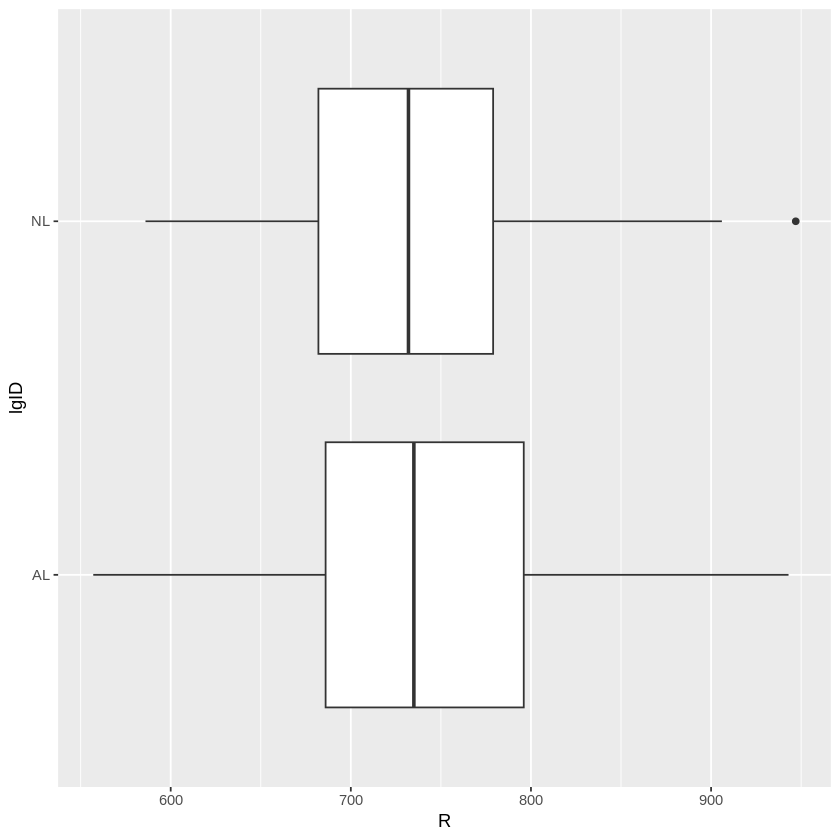

In [20]:
df %>% ggplot(aes(x=R, y=lgID)) + geom_boxplot()

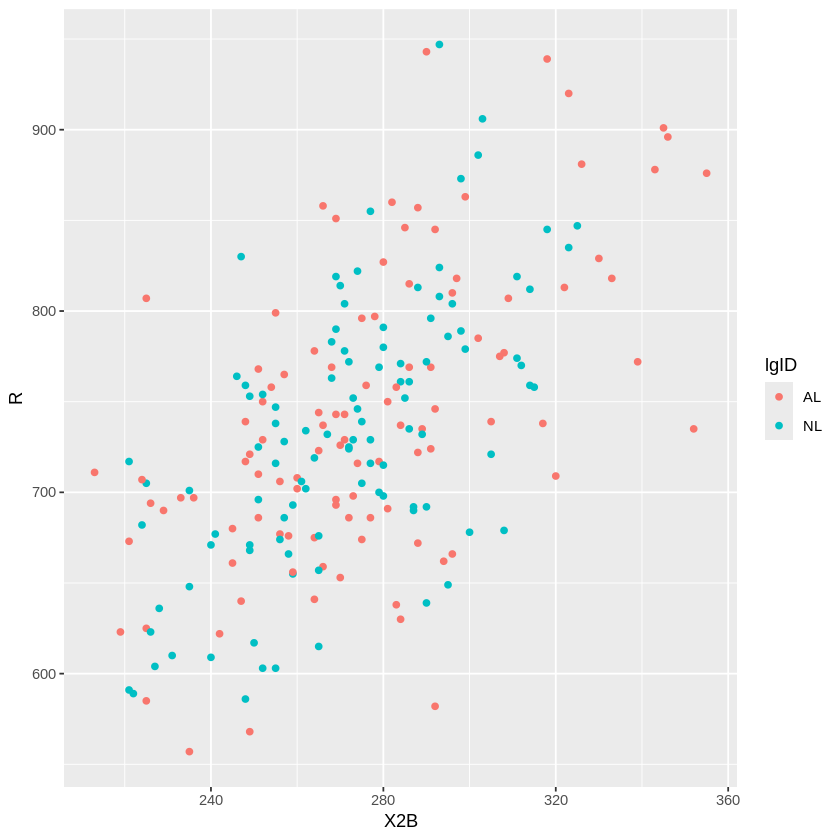

In [21]:
df %>% ggplot(aes(x=X2B, y=R, color=lgID)) + geom_point()

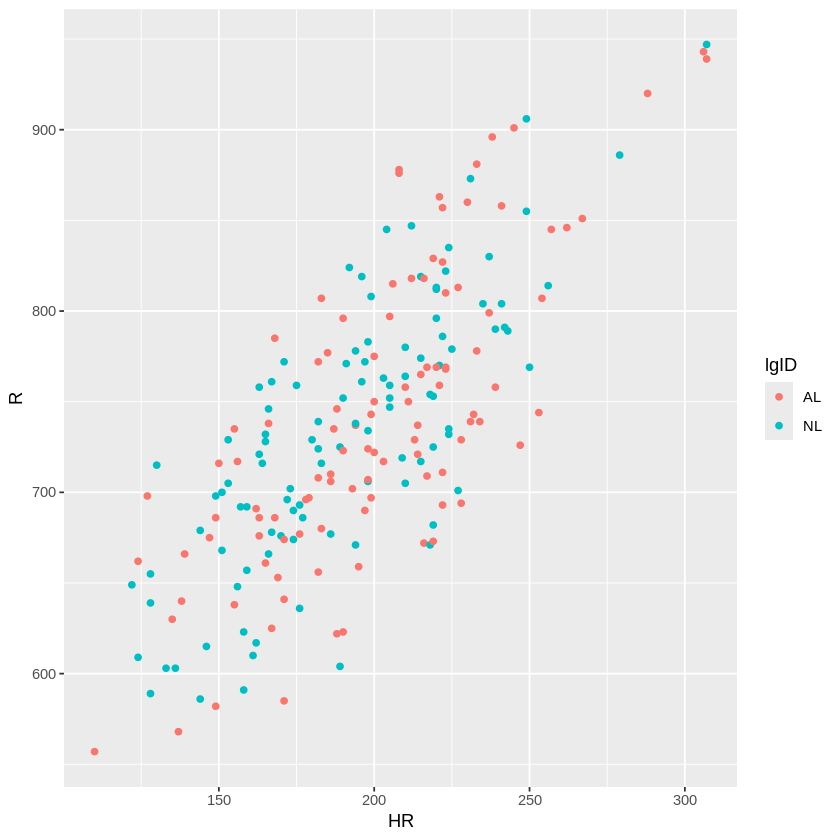

In [22]:
df %>% ggplot(aes(x=HR, y=R, color=lgID)) + geom_point()

In [23]:
model1 <- lm(R ~ lgID, data=df)
summary(model1)


Call:
lm(formula = R ~ lgID, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-183.705  -52.769   -3.705   47.293  214.543 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  740.705      7.578   97.74   <2e-16 ***
lgIDNL        -8.248     10.717   -0.77    0.442    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 77.65 on 208 degrees of freedom
Multiple R-squared:  0.002839,	Adjusted R-squared:  -0.001955 
F-statistic: 0.5922 on 1 and 208 DF,  p-value: 0.4424


In [24]:
model2 <- lm(R ~ lgID + X2B, data=df)
summary(model2)


Call:
lm(formula = R ~ lgID + X2B, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-184.61  -38.07    0.81   40.10  179.62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 294.0467    42.4542   6.926 5.35e-11 ***
lgIDNL       -0.8339     8.6682  -0.096    0.923    
X2B           1.6184     0.1522  10.632  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 62.6 on 207 degrees of freedom
Multiple R-squared:  0.355,	Adjusted R-squared:  0.3488 
F-statistic: 56.97 on 2 and 207 DF,  p-value: < 2.2e-16


In [25]:
model3 <- lm(R ~ lgID + X2B + HR, data=df)
summary(model3)


Call:
lm(formula = R ~ lgID + X2B + HR, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-111.257  -22.732    2.877   22.000   82.526 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 104.04444   25.89269   4.018 8.22e-05 ***
lgIDNL       10.92784    4.97714   2.196   0.0292 *  
X2B           1.26796    0.08846  14.333  < 2e-16 ***
HR            1.43072    0.06899  20.739  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.71 on 206 degrees of freedom
Multiple R-squared:  0.7911,	Adjusted R-squared:  0.7881 
F-statistic: 260.1 on 3 and 206 DF,  p-value: < 2.2e-16


In [26]:
model4 <- lm(R ~ lgID*X2B + HR, data=df)
summary(model4)


Call:
lm(formula = R ~ lgID * X2B + HR, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-109.179  -22.386    2.415   22.005   82.714 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 117.27408   32.53971   3.604 0.000393 ***
lgIDNL      -21.87520   49.00754  -0.446 0.655805    
X2B           1.22154    0.11228  10.879  < 2e-16 ***
HR            1.42864    0.06915  20.661  < 2e-16 ***
lgIDNL:X2B    0.12001    0.17836   0.673 0.501810    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.76 on 205 degrees of freedom
Multiple R-squared:  0.7916,	Adjusted R-squared:  0.7875 
F-statistic: 194.7 on 4 and 205 DF,  p-value: < 2.2e-16


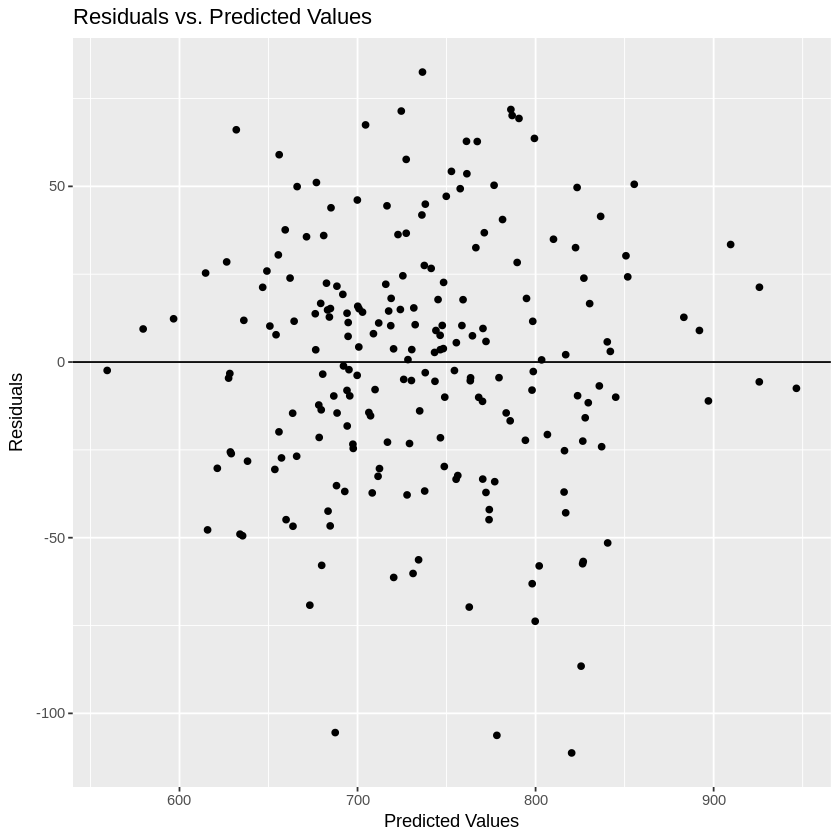

In [27]:
model3 %>%
  fortify(model3$model) %>%
  ggplot(aes(x = .fitted,
             y = .resid)) +
  geom_point()+
  geom_hline(yintercept = 0) +
  labs( x = "Predicted Values",
        y = "Residuals",
        title = "Residuals vs. Predicted Values")

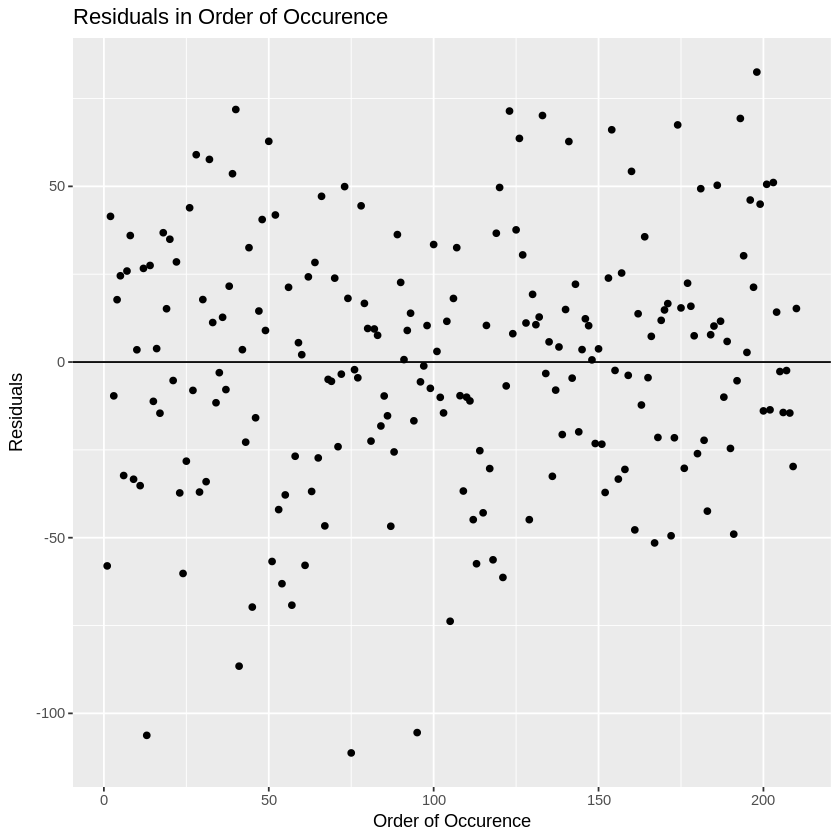

In [32]:
model3 %>%
  fortify(model3$model) %>%
  mutate(row = row_number()) %>%
  ggplot(aes(x = row,
             y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(x = "Order of Occurence",
       y = "Residuals",
       title = "Residuals in Order of Occurence")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


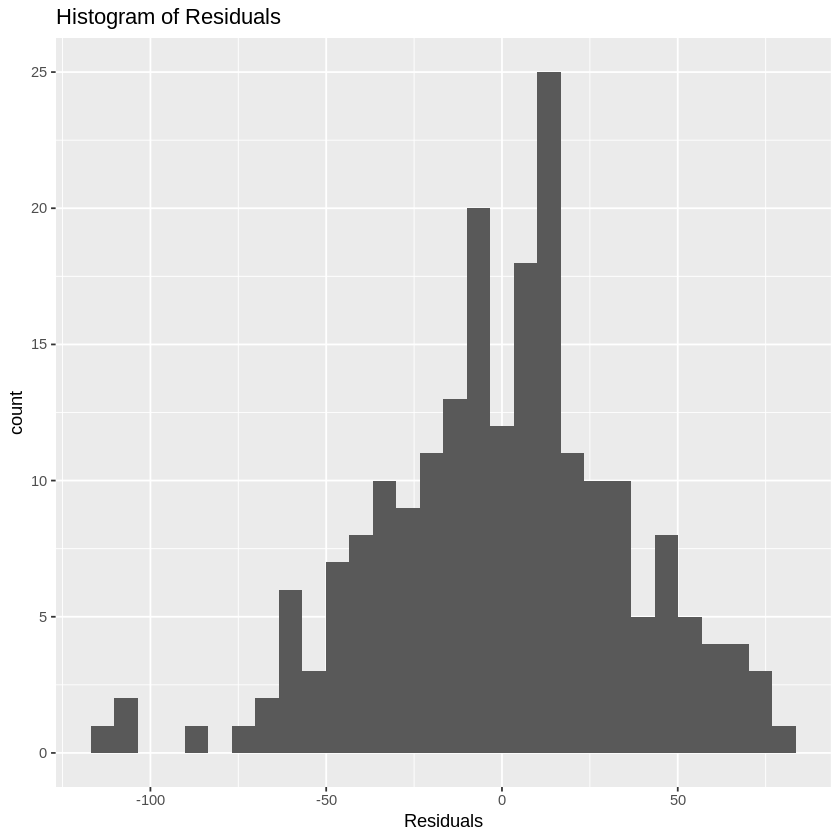

In [34]:
model3 %>%
  fortify(model3$model) %>%
  ggplot(aes(x = .resid)) +
  geom_histogram() +
  labs(x = "Residuals",
       title = "Histogram of Residuals")